## Introduction: 
Team Dirt decided to evaluate Pittsburgh neighborhoods based on environmental cleanliness. This means minimal trash and pollution, and maximal utilization of resources to maintain a healthy living area. Individual metric scores are averaged together to contribute to a final total score.

## The Metric: 

The metrics used to evaluate Pittsburgh datasets were air quality (https://data.wprdc.org/dataset/allegheny-county-air-quality/resource/36fb4629-8003-4acc-a1ca-3302778a530d), amount of smart trash cans (https://data.wprdc.org/dataset/smart-trash-containers), and number of local bridges (INSERT LINK HERE). The neighborhoods that qualify can be found here:
https://data.wprdc.org/dataset/neighborhoods2


## The Best Neighborhood:

### Air Quality Score

In [9]:
import pandas as pd
import matplotlib.pyplot as plot

data = pd.read_csv("ppm_ppb.csv", index_col="_id")

neighbor_qual = {}

def average(neighbor, data):
    # avg = df[df['site'] == 'name']['report_value'].mean()
    
    avg_qual = data[data['site'] == neighbor]['report_value'].mean()
    return avg_qual

def load_neighbors(df, neighbor_qual):
    neighbors = df['site'].unique()
    
    for hood in neighbors:
        # add to dict
        neighbor_qual[hood] = average(hood, df)

load_neighbors(data, neighbor_qual)
min_val = data['report_value'].min()
max_val = data['report_value'].max()
mid_val = (max_val-min_val)/2

vals = data['site'].value_counts()

plot.rcParams.update({'font.size': 100})

pd.Series(vals).plot(kind='barh', rot=0.5, edgecolor='black', figsize=(100, 300))

plot.xlabel('Air Quality (PPB)')  
plot.ylabel('Neighborhood')
plot.title('Air Quality Reports Per Pittsburgh Neighborhood')  

for i, val in enumerate(vals):
    plot.text(val, i, str(val), ha='left', va='center')


In [10]:
scores = 1 + (((vals - vals.min()) * (10 - 1)) / (vals.max() - vals.min()))
pd.DataFrame({'site': scores.index, 'score': scores},  index=vals.index)

,site,score
Lawrenceville,Lawrenceville,10.000000
Harrison Township,Harrison Township,7.306114
Parkway East,Parkway East,5.581110
Avalon,Avalon,4.109051
Liberty,Liberty,4.108311
South Fayette,South Fayette,4.108311
North Braddock,North Braddock,1.162713
Flag Plaza,Flag Plaza,1.162713
Court House,Court House,1.000000


note for whoever averages the finals:
- if your neighborhood isn't included in mine, do your score plus other partner score and divide by only two (exclude my data from that neighborhood)
- since my data is structured as the highest concentration of pollution being the worst, i will rewrite results below to mirror your data of 1 being worst and 10 being best:


Lawrenceville: 1
Harrison Township: 2.7
Parkway East: 4.41
Avalon: 5.8
Liberty: 5.8
South Fayette: 5.8
North Braddock: 8.84
Flag Plaza: 8.84
Courthouse/Downtown: 9 or 10

### Smart Trash Can Score

In [ ]:
# THIS IS WHAT WON"T RUN - CHECK ERROR FILE NOT FOUND

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

stc = pd.read_csv("smart-trash-cans.csv")
counts = stc['neighborhood'].value_counts()

plt.rcParams.update({'font.size': 100})

pd.Series(counts).plot(kind='barh', rot=0.5, edgecolor='black', figsize=(100, 300))

plt.xlabel('Smart Trash Containers')  
plt.ylabel('Neighborhood')
plt.title('Smart Trash Containers Per Pittsburgh Neighborhood')  

for i, count in enumerate(counts):
    plt.text(count, i, str(count), ha='left', va='center')

In [6]:
scores = 1 + (((counts - counts.min()) * (10 - 1)) / (counts.max() - counts.min()))
pd.DataFrame({'neighborhood': scores.index, 'score': scores},  index=counts.index)

,neighborhood,score
Homewood South,Homewood South,1.000000
Strip District,Strip District,1.000000
Summer Hill,Summer Hill,1.000000
Beechview,Beechview,1.000000
Manchester,Manchester,1.000000
Point Breeze,Point Breeze,1.000000
Banksville,Banksville,1.000000
Allentown,Allentown,1.000000
Lower Lawrenceville,Lower Lawrenceville,1.000000
Fineview,Fineview,1.000000


### Bridge Score

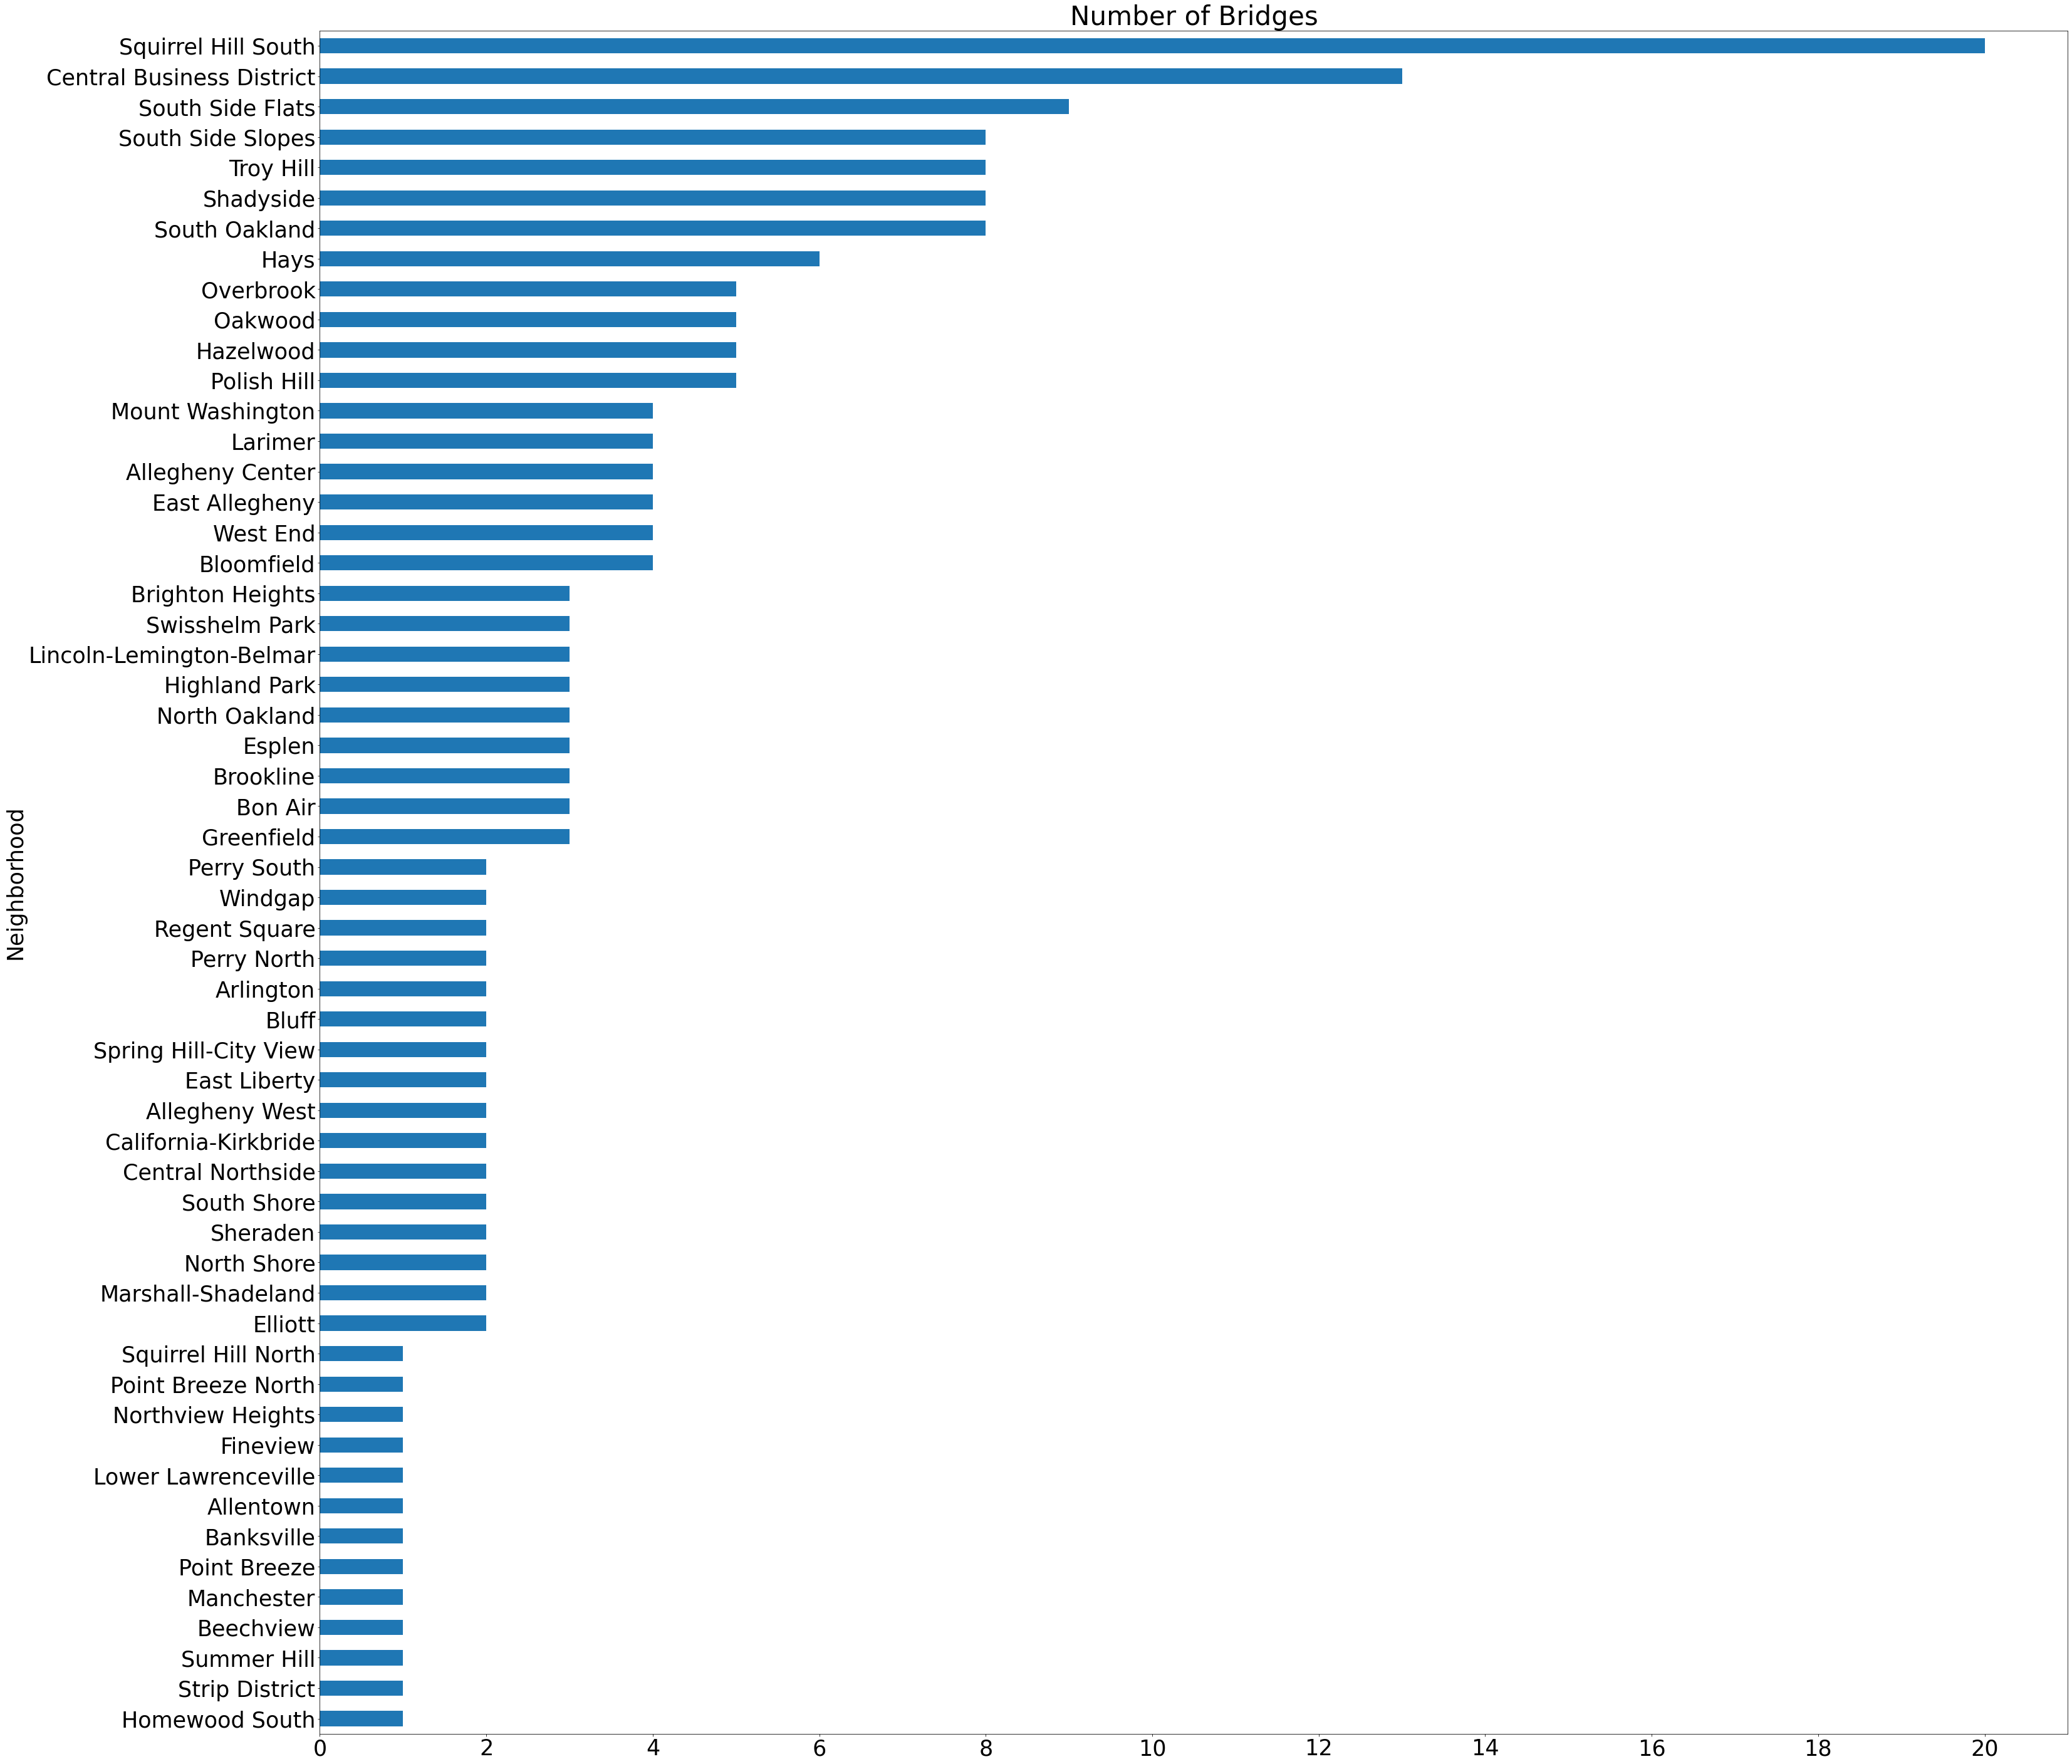

In [2]:
counts = counts.sort_values()
plt.rcParams.update({'font.size': 35})
counts.plot(kind='barh', title='Number of Bridges', ylabel="Count", xlabel="Neighborhood", figsize=(50, 50), xticks=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

In [4]:
n_df = pd.read_csv("pitt_neighborhoods.csv")
hoods = n_df['hood']
rating = dict()
for neigh in hoods:
    if neigh in counts:
        rating[neigh] = counts[neigh]/2
    else:
        rating[neigh] = 0
        
rating = pd.Series(rating)
rating = rating.sort_values(ascending=False)
rating

Squirrel Hill South          10.0
Central Business District     6.5
South Side Flats              4.5
Shadyside                     4.0
Troy Hill                     4.0
                             ... 
Beltzhoover                   0.0
Fairywood                     0.0
Mt. Oliver                    0.0
Chartiers City                0.0
Arlington Heights             0.0
Length: 90, dtype: float64

## Final Scoring

Based on the averages of the top ten neighborhoods in each metric, the top neighborhood is (INSERT TOP)